<a href="https://colab.research.google.com/github/radhikasharma-0203/Reinforcement-Learning-21csu462/blob/main/Experiment_4_Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thompson Sampling Total Reward: 1366.6131636564187


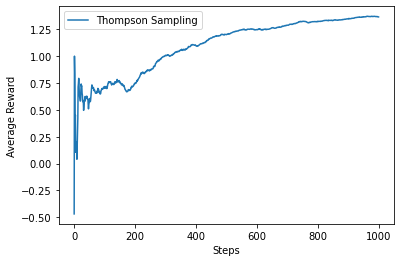

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def thompson_sampling_solver(true_means, num_steps):
    num_bandits = len(true_means)
    alpha = np.ones(num_bandits)
    beta = np.ones(num_bandits)
    rewards = np.zeros(num_steps)
    total_reward = 0

    for step in range(num_steps):
        sampled_means = np.random.beta(alpha, beta)
        arm_to_pull = np.argmax(sampled_means)
        reward = np.random.normal(true_means[arm_to_pull], 1)
        total_reward += reward

        if reward > 0:
            alpha[arm_to_pull] += 1
        else:
            beta[arm_to_pull] += 1

        rewards[step] = total_reward / (step + 1)

    return rewards, total_reward
def main():
    np.random.seed(42)

    num_bandits = 5
    num_steps = 1000

    true_means = np.random.normal(0, 1, num_bandits)

    thompson_rewards, thompson_total_reward = thompson_sampling_solver(true_means, num_steps)

    print("Thompson Sampling Total Reward:", thompson_total_reward)

    plt.plot(thompson_rewards, label='Thompson Sampling')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
